In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv("video_game_purchase_intent.csv")

In [3]:
dataset

,Age,Gender,Income Level,Genre Preference,Platform,Price Sensitivity,Previous Purchases,Hours Spent Gaming Weekly,Marketing Response,Review Score,Purchase Intent
0,48,Male,118818,Adventure,PlayStation,0.758267,10,36,0.200911,6,Will Purchase
1,38,Male,172360,Adventure,PC,0.306905,3,21,0.805119,8,No Interest
2,24,Male,115081,Sports,PlayStation,0.414971,17,6,0.850133,9,No Interest
3,52,Female,56877,RPG,PlayStation,0.712778,3,1,0.289150,6,Will Purchase
4,17,Male,131562,Sports,Xbox,0.386212,16,4,0.952260,9,Will Purchase
...,...,...,...,...,...,...,...,...,...,...,...
995,35,Female,141673,Sports,Mobile,0.459331,9,3,0.842555,7,Will Purchase
996,43,Female,85633,Adventure,Xbox,0.752129,6,12,0.362182,1,Interested
997,54,Female,116111,Adventure,PC,0.905539,7,39,0.660470,2,Will Purchase
998,15,Female,98258,Strategy,PC,0.835373,2,12,0.470816,6,Purchased


In [4]:
X = dataset.drop('Purchase Intent', axis=1)
y = dataset['Purchase Intent']

In [6]:
categorical_cols = ["Gender", "Genre Preference", "Platform"]
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(X[categorical_cols]).toarray()
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_X = pd.DataFrame(encoded_data, columns=encoded_cols)
final_X = pd.concat([X.drop(columns=categorical_cols), encoded_X], axis=1)

In [7]:
final_X

,Age,Income Level,Price Sensitivity,Previous Purchases,Hours Spent Gaming Weekly,Marketing Response,Review Score,Gender_Female,Gender_Male,Gender_Other,Genre Preference_Action,Genre Preference_Adventure,Genre Preference_RPG,Genre Preference_Sports,Genre Preference_Strategy,Platform_Mobile,Platform_PC,Platform_PlayStation,Platform_Xbox
0,48,118818,0.758267,10,36,0.200911,6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,38,172360,0.306905,3,21,0.805119,8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,24,115081,0.414971,17,6,0.850133,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,52,56877,0.712778,3,1,0.289150,6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,17,131562,0.386212,16,4,0.952260,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35,141673,0.459331,9,3,0.842555,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
996,43,85633,0.752129,6,12,0.362182,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,54,116111,0.905539,7,39,0.660470,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,15,98258,0.835373,2,12,0.470816,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [8]:
scaler = MinMaxScaler()
continuous_cols = ["Age", "Income Level", "Price Sensitivity", "Previous Purchases",
                   "Hours Spent Gaming Weekly", "Marketing Response", "Review Score"]
final_X[continuous_cols] = scaler.fit_transform(final_X[continuous_cols])

In [9]:
final_X

,Age,Income Level,Price Sensitivity,Previous Purchases,Hours Spent Gaming Weekly,Marketing Response,Review Score,Gender_Female,Gender_Male,Gender_Other,Genre Preference_Action,Genre Preference_Adventure,Genre Preference_RPG,Genre Preference_Sports,Genre Preference_Strategy,Platform_Mobile,Platform_PC,Platform_PlayStation,Platform_Xbox
0,0.775510,0.548641,0.760029,0.526316,0.921053,0.199876,0.555556,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.571429,0.846399,0.307506,0.157895,0.526316,0.805275,0.777778,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.285714,0.527859,0.415851,0.894737,0.131579,0.850378,0.888889,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.857143,0.204174,0.714423,0.157895,0.000000,0.288289,0.555556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.142857,0.619513,0.387018,0.842105,0.078947,0.952706,0.888889,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.510204,0.675743,0.460325,0.473684,0.052632,0.842784,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
996,0.673469,0.364092,0.753875,0.315789,0.289474,0.361464,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,0.897959,0.533587,0.907679,0.368421,1.000000,0.660341,0.111111,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.102041,0.434303,0.837333,0.105263,0.289474,0.470313,0.555556,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [10]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(final_X, y_encoded, test_size=0.2, random_state=42)

In [12]:
distance_metrics = ['euclidean', 'manhattan', 'distance']
k_values = [1, 3, 5, 7, 9]
accuracy_scores_distance = {}

# Applying KNN with different distance metrics and k values
for metric in distance_metrics:
    accuracy_scores_distance[metric] = {}
    for k in k_values:
        # For weighted distances, weights are inversely proportional to distance
        if metric == 'distance':
            knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
        else:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test.values)
        accuracy_scores_distance[metric][k] = accuracy_score(y_test, y_pred)

accuracy_scores_distance

{'euclidean': {1: 0.3, 3: 0.26, 5: 0.25, 7: 0.26, 9: 0.255},
 'manhattan': {1: 0.28, 3: 0.24, 5: 0.285, 7: 0.265, 9: 0.235},
 'distance': {1: 0.3, 3: 0.305, 5: 0.29, 7: 0.265, 9: 0.285}}

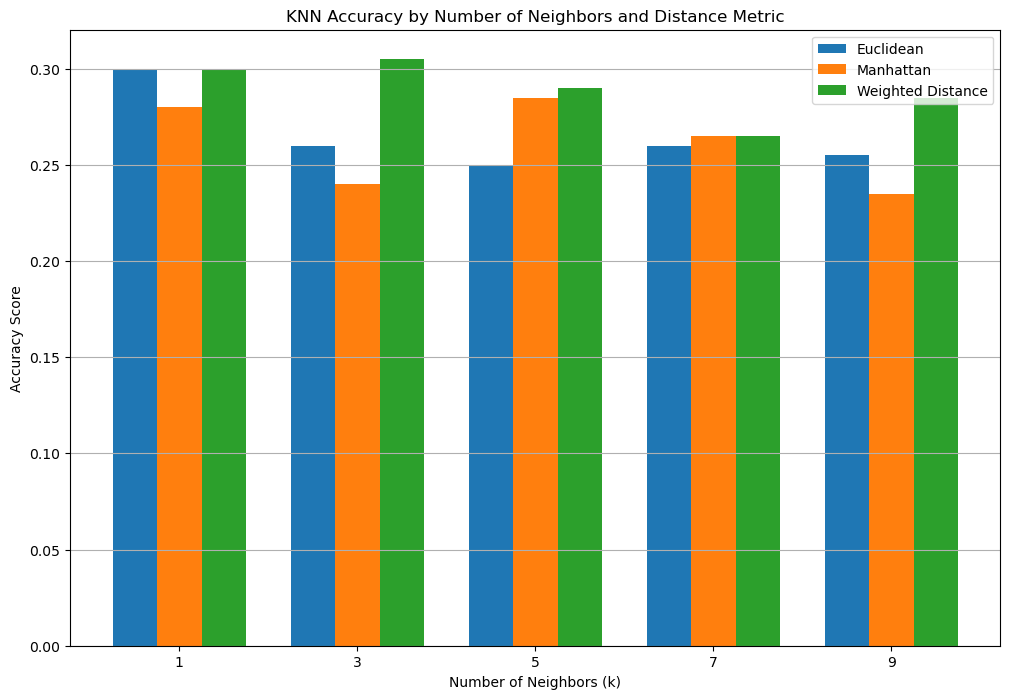

In [13]:
import matplotlib.pyplot as plt



metric_labels = ['Euclidean', 'Manhattan', 'Weighted Distance']  # Labels for the bars, adjust as needed

# Setting up the figure
plt.figure(figsize=(12, 8))

# The width of the bars
bar_width = 0.25

# Set positions of the bars
positions = np.arange(len(k_values))

# Plotting each metric's accuracy scores for each k value
for i, metric in enumerate(distance_metrics):
    accuracies = [accuracy_scores_distance[metric][k] for k in k_values]
    plt.bar(positions + i * bar_width, accuracies, width=bar_width, label=metric_labels[i])

# Customization
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('KNN Accuracy by Number of Neighbors and Distance Metric')
plt.xticks(positions + bar_width, k_values)
plt.legend()
plt.grid(axis='y')

plt.show()
